In [1]:
# Importing all the required Classes
from Simulation import *
from Particle import *
from Forces import *
import random



def generate(n, Simulation):
    print("\nGenerating particles:")
    for x in tqdm(range(n), unit=" Particle(s)"):
        # between 20 mu meters
        position = np.array([0.0000001,0,0]) # all start from origin
        velocity = np.array([np.random.normal(loc=0, scale=10),np.random.normal(loc=0, scale=10),random.randint(0,10)]) * 1e-7
        mass = np.abs(np.random.normal(loc=100, scale=25))* 1e-19  # mass of particles
        charge = 0;
        Simulation.Particles.append(Particle(position, velocity, mass, charge))
        



Generating particles:


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 11906.41 Particle(s)/s]



obj -> array


100%|████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 97541.95it/s]


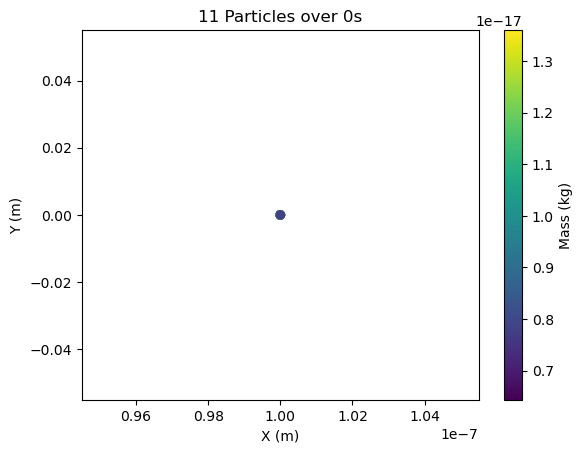


Initialising Particle Simulations.
Setting up enviroment


Simulating particles:


100%|████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 6173.23 Time Steps/s]



 Simulation:
	Particles = 11
	Simulated time = 5s
	Time intervals = 0.001s
	Compute Time = 0.8114218711853027s
	Total number of calculatios = 55000

Forces:
	Gravity = [ 0.   0.  -9.8]


obj -> array


100%|████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 84655.68it/s]


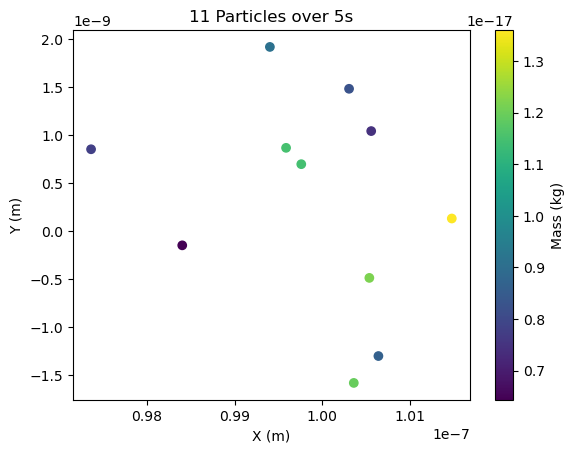

In [2]:
# Create a simulation
sim = Simulation()

generate(11, sim)

# Add gravity force to the simulation
sim.Forces.append(Gravity())

sim.Save()

sim.Plot()

# Runns the simulation 
sim.Run(5, 0.001)

# plot the simulation results
sim.Plot()
# sim.PlotPaths()


Generating particles:


100%|██████████████████████████████████████████████████████████████████████████| 110000/110000 [00:02<00:00, 52999.08 Particle(s)/s]



obj -> array


100%|███████████████████████████████████████████████████████████████████████████████████| 110000/110000 [00:00<00:00, 386928.74it/s]


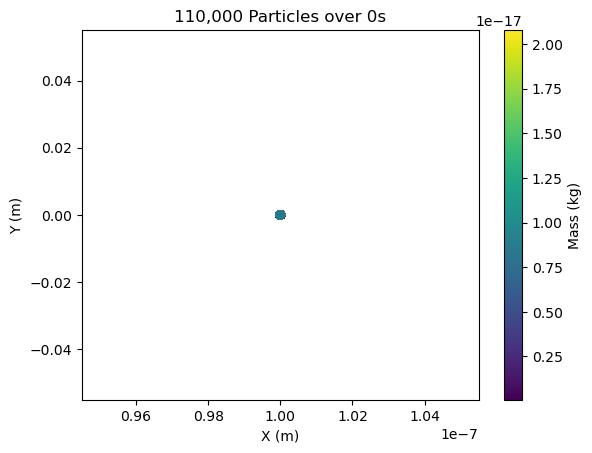


Initialising Particle Simulations.

	...Setting up enviroment for FAST MODE


obj -> array


100%|███████████████████████████████████████████████████████████████████████████████████| 110000/110000 [00:00<00:00, 380812.55it/s]



Simulating particles (fast mode):


100%|██████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:46<00:00, 108.65it/s]



array -> obj


100%|███████████████████████████████████████████████████████████████████████████████████| 110000/110000 [00:00<00:00, 665729.88it/s]



 Simulation:
	Particles = 110000
	Simulated time = 5s
	Time intervals = 0.001s
	Compute Time = 46.020431995391846s
	Total number of calculatios = 550000000

Forces:
	Gravity = [ 0.   0.  -9.8]


obj -> array


100%|███████████████████████████████████████████████████████████████████████████████████| 110000/110000 [00:00<00:00, 394388.18it/s]


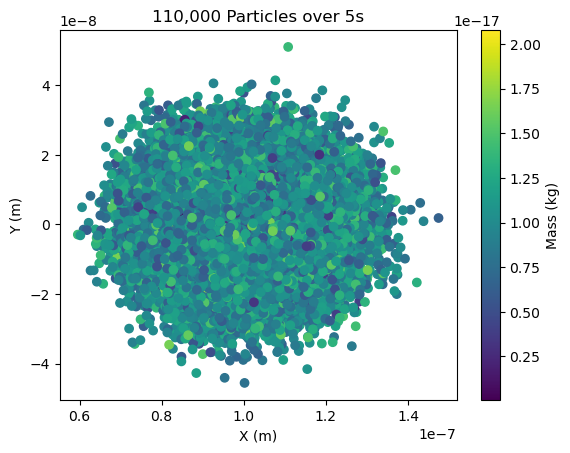


obj -> array


100%|███████████████████████████████████████████████████████████████████████████████████| 110000/110000 [00:00<00:00, 393286.84it/s]


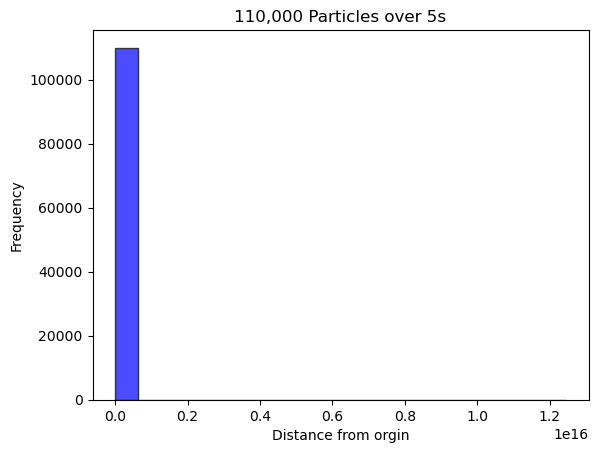

In [4]:
sim = Simulation()

generate(110000, sim)

# Add gravity force to the simulation
sim.Forces.append(Gravity())

sim.Save()

sim.Plot()

# Runns the simulation 
sim.FastRun(5, 0.001)

# plot the simulation results
sim.Plot()
sim.Histogram()
# sim.PlotPaths()


obj -> array


100%|███████████████████████████████████████████████████████████████████████████████████| 110000/110000 [00:00<00:00, 374177.39it/s]


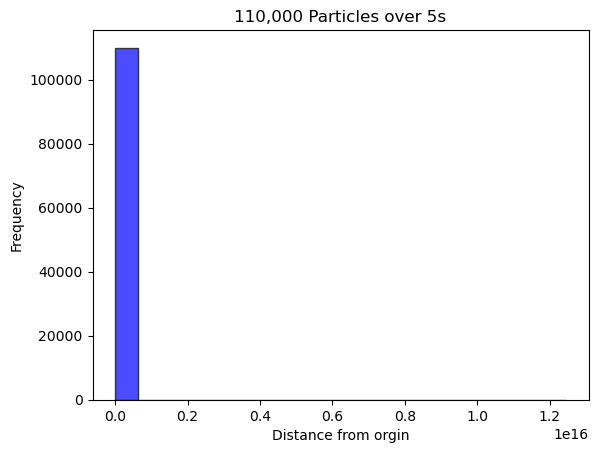

In [5]:

sim.Histogram()
